In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
abnormal = pd.read_csv('/home/dang032003/mlmed2024/ECG/ptbdb_abnormal.csv', header=None)
normal = pd.read_csv('/home/dang032003/mlmed2024/ECG/ptbdb_normal.csv', header=None)
test = pd.read_csv('/home/dang032003/mlmed2024/ECG/mitbih_test.csv', header=None)
train = pd.read_csv('/home/dang032003/mlmed2024/ECG/mitbih_train.csv', header=None)

Text(0.5, 1.0, 'test')

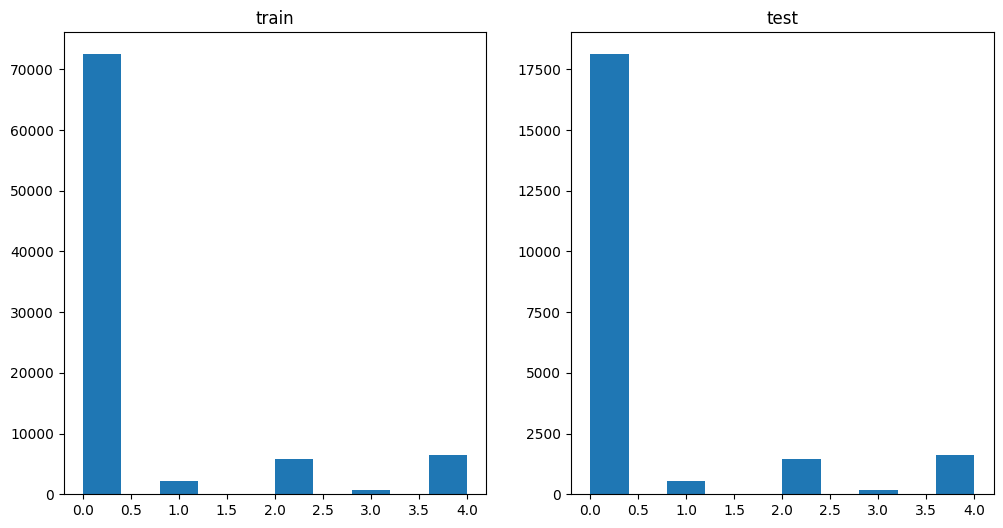

In [3]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(train[187])
plt.title("train")  

plt.subplot(1,2,2)
plt.hist(test[187])
plt.title("test")



Text(0.5, 1.0, 'test')

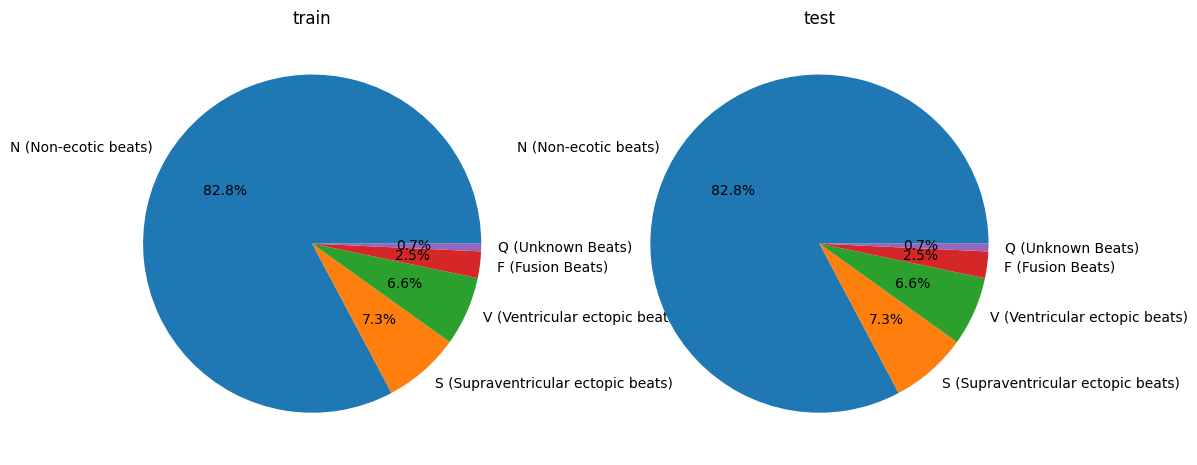

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(train[187].value_counts(), labels=['N (Non-ecotic beats)','S (Supraventricular ectopic beats)','V (Ventricular ectopic beats)','F (Fusion Beats)','Q (Unknown Beats)'], autopct='%1.1f%%')
plt.title("train")

plt.subplot(1,2,2)
plt.pie(test[187].value_counts(), labels=['N (Non-ecotic beats)','S (Supraventricular ectopic beats)','V (Ventricular ectopic beats)','F (Fusion Beats)','Q (Unknown Beats)'], autopct='%1.1f%%')
plt.title("test")

In [5]:
train_target=train[187]
test_target=test[187]
train=train.drop(187,axis=1)
test=test.drop(187,axis=1)

In [11]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X_resampled, train_target_resampled = ros.fit_resample(train, train_target)
train_resampled = pd.DataFrame(X_resampled, columns=train.columns)

X_resampled, test_target_resampled = ros.fit_resample(test, test_target)
test_resampled = pd.DataFrame(X_resampled, columns=test.columns)

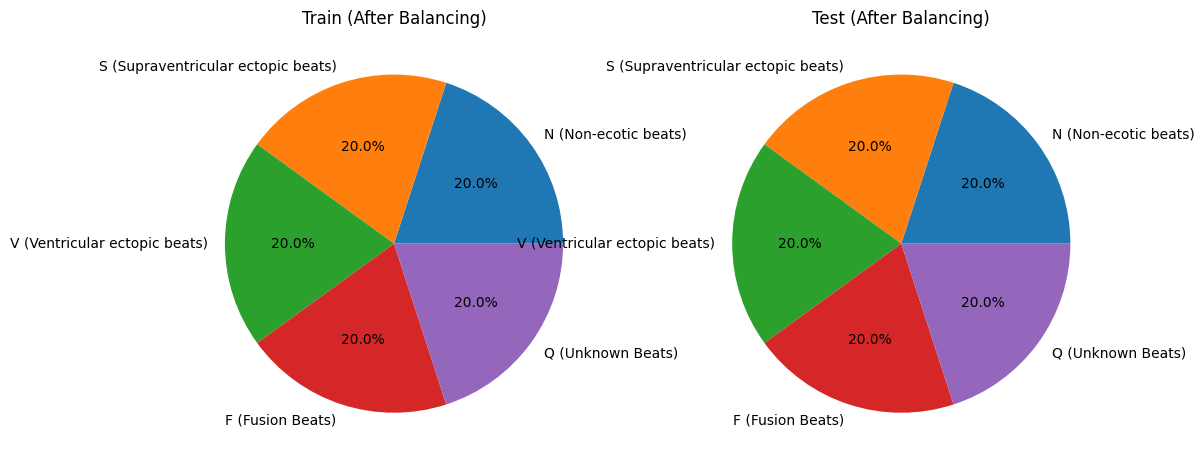

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(train_target_resampled.value_counts(), labels=['N (Non-ecotic beats)','S (Supraventricular ectopic beats)','V (Ventricular ectopic beats)','F (Fusion Beats)','Q (Unknown Beats)'], autopct='%1.1f%%')
plt.title("Train (After Balancing)")

plt.subplot(1,2,2)
plt.pie(test_target_resampled.value_counts(), labels=['N (Non-ecotic beats)','S (Supraventricular ectopic beats)','V (Ventricular ectopic beats)','F (Fusion Beats)','Q (Unknown Beats)'], autopct='%1.1f%%')
plt.title("Test (After Balancing)")
plt.show()

In [18]:
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(train_resampled, train_target_resampled)

RandomForestClassifier(n_estimators=10, random_state=42)

In [19]:
predictions = model.predict(test_resampled)
accuracy = model.score(test_resampled, test_target_resampled)

print("Predictions:", predictions)
print("Accuracy:", accuracy)

Predictions: [0. 0. 0. ... 4. 4. 4.]
Accuracy: 0.814449718511977
